In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
%matplotlib widget

In [2]:
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
def meanAndCI(EEGs):

    mean = np.mean(EEGs,axis=0)

    lowerbound = scipy.stats.t.ppf(0.05,9,mean,np.std(EEGs,axis=0))
    upperbound = scipy.stats.t.ppf(0.95,9,mean,np.std(EEGs,axis=0))

    return mean, lowerbound, upperbound
        

In [4]:
def getPvals(EEGs, EEGs2):

    result = scipy.stats.ttest_ind(EEGs, EEGs2,equal_var=False)

    return result.pvalue*len(result.pvalue)

In [5]:
def getEEGs(path):

    EEGs = list(np.zeros(10))

    for i in range(10):

        for file in os.listdir(path+'/'+str(i)+'/pkls'):

            EEGs[i] += pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[20000:30000,0] 

    
    EEGs = np.array(EEGs)
    EEGs -= np.mean(EEGs,axis=-1)[:,np.newaxis]

    return EEGs

In [6]:
def getStuff(path):

    EEGs = getEEGs(path)
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound 

In [7]:
def getEEGs_byLayer(path):

    EEG_byLayer = []

    for i in range(10):

        E0 = []


        EEGs = {}
    
        for file in os.listdir(path+'/'+str(i)+'/pkls'):
            t = file.split('.')[0].split('g')[1]
            
            EEGs[t] = pd.read_pickle(path+'/'+str(i)+'/pkls/'+file).values[20000:30000,0] 


        
        for l, layer in enumerate(np.arange(2,7)):

            E = 0

            for t in EEGs.keys():
                if str(layer) in t:

                        
                    E += EEGs[t]

            E0.append(E)

        EEG_byLayer.append(E0)

    EEG_byLayer = np.array(EEG_byLayer)

    EEG_byLayer -= np.mean(EEG_byLayer,axis=-1)[:,:,np.newaxis]

    return EEG_byLayer

In [8]:
def getByLayer(path):

    EEGs = np.array(getEEGs_byLayer(path))
    mean, lowerbound, upperbound = meanAndCI(EEGs)

    return mean, lowerbound, upperbound 

In [9]:
EEGs = getEEGs('.')

In [10]:
EEGsRewired = getEEGs('../../rewired/12a30273-35bf-49c2-b82f-9e5699489561')

In [11]:
EEGsDisconnected = getEEGs('../../disconnected/d851ea52-d571-420f-bd23-d77489af0fac')

In [12]:
EEGsReplay = getEEGs('../../rewired/replay/c6c46053-7bd4-475d-8919-b3ac90585eea')

In [13]:
EEGsByLayer = getEEGs_byLayer('.')
EEGsByLayerRewired = getEEGs_byLayer('../../rewired/12a30273-35bf-49c2-b82f-9e5699489561')
EEGsByLayerDisconnected = getEEGs_byLayer('../../disconnected/d851ea52-d571-420f-bd23-d77489af0fac')
EEGsByLayerReplay = getEEGs_byLayer('../../rewired/replay/c6c46053-7bd4-475d-8919-b3ac90585eea')

In [14]:
EEGsL6 = getEEGs('../../investigateL6/5c2b683e-ca83-4e69-9609-650881235ad2')

In [15]:
EEGsL6ByLayer = getEEGs_byLayer('../../investigateL6/5c2b683e-ca83-4e69-9609-650881235ad2')

In [16]:
pvalsRewired = getPvals(EEGs,EEGsRewired)

In [17]:
pvalsReplay = getPvals(EEGsReplay,EEGsRewired)

In [18]:
pvalsDisconnected = getPvals(EEGs,EEGsDisconnected)

In [19]:
pvalsL6 = getPvals(EEGs,EEGsL6)

In [20]:
rewiredIndices = np.where(pvalsRewired < 0.01)[0]

In [21]:
disconnectedIndices = np.where(pvalsDisconnected< 0.01)[0]

In [22]:
replayIndices = np.where(pvalsReplay< 0.01)[0]

In [23]:
L6Indices = np.where(pvalsL6< 0.01)[0]

In [44]:
pvalsRewiredByLayer = getPvals(EEGsByLayer,EEGsByLayerRewired)
pvalsDisconnectedByLayer = getPvals(EEGsByLayer,EEGsByLayerDisconnected)
pvalsReplayByLayer = getPvals(EEGsByLayerReplay,EEGsByLayerDisconnected)

# pvalsL6ByLayer = getPvals(EEGsByLayer,EEGsL6ByLayer)

rewiredIndicesByLayer = []
replayIndicesByLayer = []
disconnectedIndicesByLayer = []
# L6IndicesByLayer = []

for i in range(5):
    rewiredIndicesByLayer.append( np.where(pvalsRewiredByLayer[i] < 0.1)[0] )
    replayIndicesByLayer.append( np.where(pvalsReplayByLayer[i] < 0.1)[0] )
    disconnectedIndicesByLayer.append( np.where(pvalsDisconnectedByLayer[i] < 0.1)[0] )
    # L6IndicesByLayer.append( np.where(pvalsL6ByLayer[i] < 0.1)[0] )

In [25]:
mean, lowerbound, upperbound = getStuff('.')

In [26]:
mean_layer, lowerbound_layer, upperbound_layer = getByLayer('.')


In [27]:
meanRewired, lowerboundRewired, upperboundRewired = getStuff('../../rewired/12a30273-35bf-49c2-b82f-9e5699489561')

In [28]:
meanReplay, lowerboundReplay, upperboundReplay = getStuff('../../rewired/replay/c6c46053-7bd4-475d-8919-b3ac90585eea')

In [29]:
meanRewired_layer, lowerboundRewired_layer, upperboundRewired_layer = getByLayer('../../rewired/12a30273-35bf-49c2-b82f-9e5699489561')


In [30]:
meanReplay_layer, lowerboundReplay_layer, upperboundReplay_layer = getByLayer('../../rewired/replay/c6c46053-7bd4-475d-8919-b3ac90585eea')


In [31]:
meanDisconnected, lowerboundDisconnected, upperboundDisconnected = getStuff('../../disconnected/d851ea52-d571-420f-bd23-d77489af0fac')


In [32]:
meanDisconnected_layer, lowerboundDisconnected_layer, upperboundDisconnected_layer = getByLayer('../../disconnected/d851ea52-d571-420f-bd23-d77489af0fac')


In [28]:
meanL6, lowerboundL6, upperboundL6 = getStuff('../../investigateL6/5c2b683e-ca83-4e69-9609-650881235ad2')
meanL6_layer, lowerboundL6_layer, upperboundL6_layer = getByLayer('../../investigateL6/5c2b683e-ca83-4e69-9609-650881235ad2')



KeyboardInterrupt



In [33]:
time = np.arange(2000,3000,0.1)


In [34]:
inVivo = np.genfromtxt('../../EEG_InVivo.csv',delimiter=',')

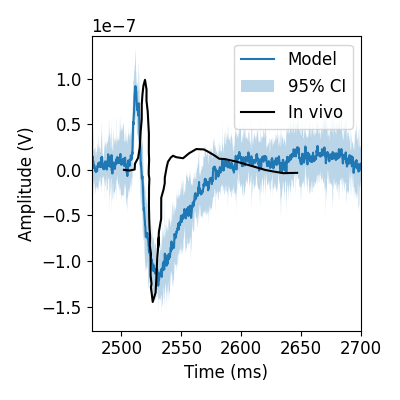

In [35]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(time,mean)
ax.fill_between(time,lowerbound,upperbound,alpha=0.3)

ax.plot(inVivo[:,0]+2500,inVivo[:,1]*1e-7,'k')

# ax.plot(time,meanRewired)
# ax.fill_between(time,lowerboundRewired,upperboundRewired,alpha=0.3)

# plt.ylim([-1.5e-7,1e-7])
plt.xlim([2475,2700])

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend(['Model','95% CI', 'In vivo'])
plt.tight_layout()

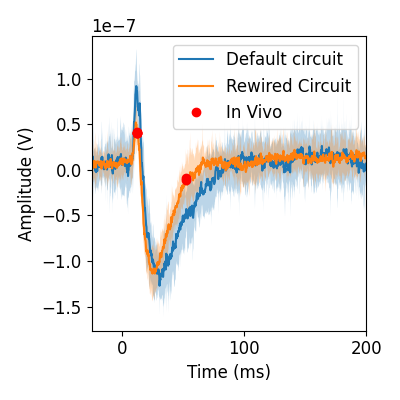

In [36]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(time,mean)

ax.plot(time,meanRewired)
# ax.plot(inVivo[:,0]+2500,inVivo[:,1]*1e-7,'k')

ax.plot(time[rewiredIndices],meanRewired[rewiredIndices],'o',c='r')

ax.fill_between(time,lowerbound,upperbound,alpha=0.3)
ax.fill_between(time,lowerboundRewired,upperboundRewired,alpha=0.3)

# plt.ylim([-1.5e-7,1e-7])
plt.xlim([2475,2700])

ax.set_xticks([2500,2600,2700],['0','100','200'])

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend(['Default circuit', 'Rewired Circuit','In Vivo'])
plt.tight_layout()

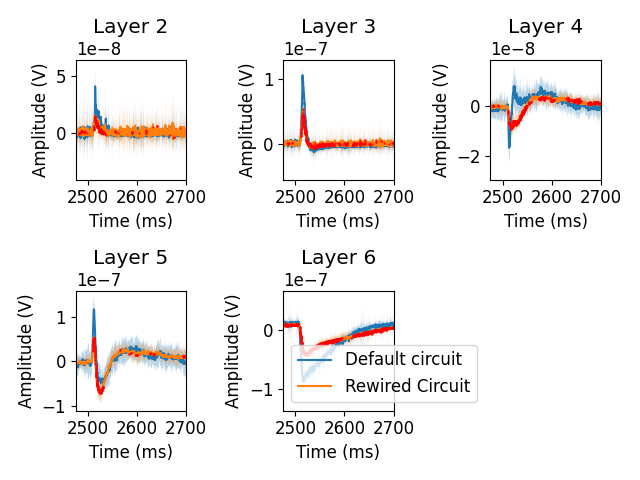

In [37]:
plt.figure()

for i in range(5):
    
    ax = plt.subplot(2,3,i+1)
    
    plt.plot(time,mean_layer[i])
    plt.plot(time,meanRewired_layer[i])
    
    plt.fill_between(time,lowerbound_layer[i],upperbound_layer[i],alpha=0.3)

    
    plt.plot(time[rewiredIndicesByLayer[i]],meanRewired_layer[i][rewiredIndicesByLayer[i]],'o',c='r',markersize=0.5)
    
    plt.fill_between(time,lowerboundRewired_layer[i],upperboundRewired_layer[i],alpha=0.3)
    
    plt.title('Layer '+str(i+2))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')

    plt.xlim([2475,2700])

    # ax.set_xticks([2500,2700],['0','200'])

    plt.tight_layout()

plt.legend(['Default circuit', 'Rewired Circuit'])



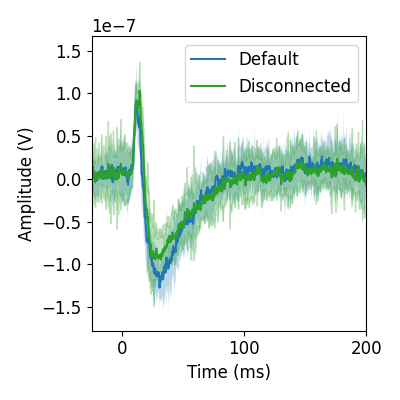

In [38]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(time,mean)
# ax.plot(time,meanRewired)

ax.plot(time,meanDisconnected,c='C2')

ax.plot(time[disconnectedIndices],meanDisconnected[disconnectedIndices],'o',c='r')


ax.fill_between(time,lowerbound,upperbound,alpha=0.3)


ax.fill_between(time,lowerboundDisconnected,upperboundDisconnected,alpha=0.3,color='C2')
# ax.fill_between(time,lowerboundRewired,upperboundRewired,alpha=0.3)

# plt.ylim([-1.5e-7,1e-7])
plt.xlim([2475,2700])

ax.set_xticks([2500,2600,2700],['0','100','200'])

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend(['Default','Disconnected'])
plt.tight_layout()

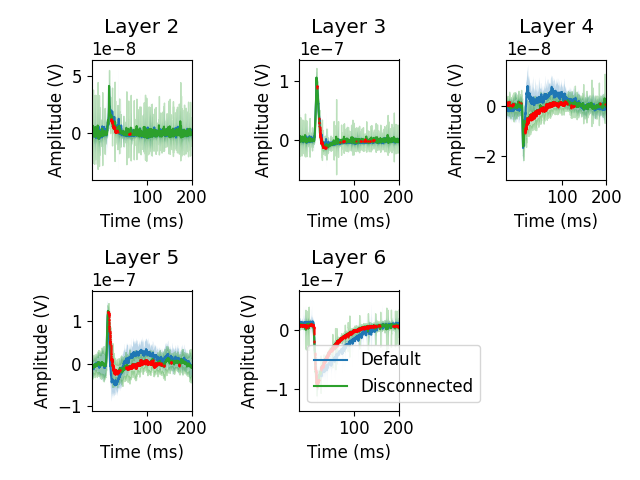

In [39]:
plt.figure()

for i in range(5):
    
    ax = plt.subplot(2,3,i+1)
    
    plt.plot(time,mean_layer[i])
    plt.plot(time,meanDisconnected_layer[i],c='C2')

    plt.plot(time[disconnectedIndicesByLayer[i]],meanDisconnected_layer[i][disconnectedIndicesByLayer[i]],'o',c='r',markersize=0.5)
    
    plt.fill_between(time,lowerbound_layer[i],upperbound_layer[i],alpha=0.3)

    plt.fill_between(time,lowerboundDisconnected_layer[i],upperboundDisconnected_layer[i],alpha=0.3,color='C2')
    
    plt.title('Layer '+str(i+2))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')

    plt.xlim([2475,2700])

    ax.set_xticks([2600,2700],['100','200'])

plt.legend(['Default', 'Disconnected'])

plt.tight_layout()

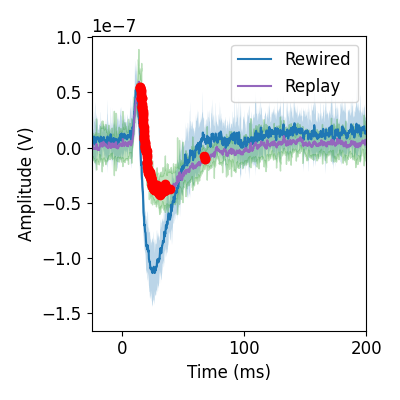

In [40]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(time,meanRewired)

ax.plot(time,meanReplay,c='C4')

ax.plot(time[replayIndices],meanReplay[replayIndices],'o',c='r')


ax.fill_between(time,lowerboundRewired,upperboundRewired,alpha=0.3)


ax.fill_between(time,lowerboundReplay,upperboundReplay,alpha=0.3,color='C2')
# ax.fill_between(timeRewired,lowerboundRewired,upperboundRewired,alpha=0.3)

# plt.ylim([-1.5e-7,1e-7])
plt.xlim([2475,2700])

ax.set_xticks([2500,2600,2700],['0','100','200'])

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (V)')
plt.legend(['Rewired','Replay'])
plt.tight_layout()

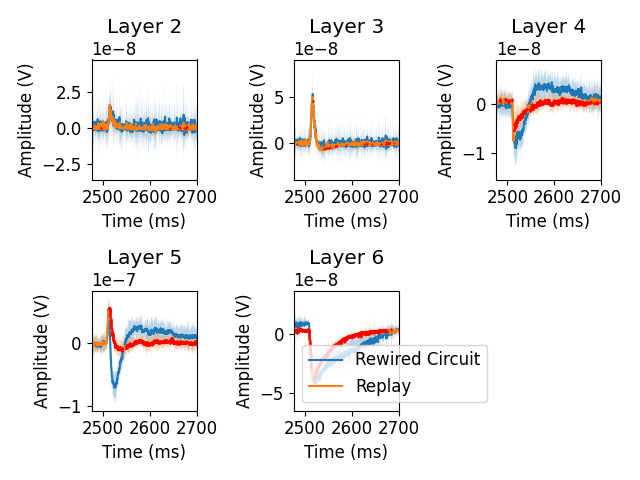

In [41]:
plt.figure()

for i in range(5):
    
    ax = plt.subplot(2,3,i+1)
    
    plt.plot(time,meanRewired_layer[i])
    plt.plot(time,meanReplay_layer[i])
    
    plt.fill_between(time,lowerboundRewired_layer[i],upperboundRewired_layer[i],alpha=0.3)

    
    plt.plot(time[replayIndicesByLayer[i]],meanReplay_layer[i][replayIndicesByLayer[i]],'o',c='r',markersize=0.5)
    
    plt.fill_between(time,lowerboundReplay_layer[i],upperboundReplay_layer[i],alpha=0.3)
    
    plt.title('Layer '+str(i+2))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')

    plt.xlim([2475,2700])

    # ax.set_xticks([2500,2700],['0','200'])

    plt.tight_layout()

plt.legend(['Rewired Circuit','Replay'])

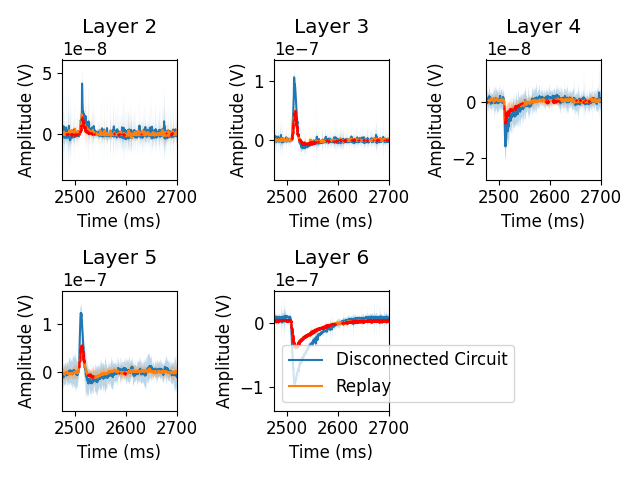

In [45]:
plt.figure()

for i in range(5):
    
    ax = plt.subplot(2,3,i+1)
    
    plt.plot(time,meanDisconnected_layer[i])
    plt.plot(time,meanReplay_layer[i])
    
    plt.fill_between(time,lowerboundDisconnected_layer[i],upperboundDisconnected_layer[i],alpha=0.3)

    
    plt.plot(time[replayIndicesByLayer[i]],meanReplay_layer[i][replayIndicesByLayer[i]],'o',c='r',markersize=0.5)
    
    plt.fill_between(time,lowerboundReplay_layer[i],upperboundReplay_layer[i],alpha=0.3)
    
    plt.title('Layer '+str(i+2))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (V)')

    plt.xlim([2475,2700])

    # ax.set_xticks([2500,2700],['0','200'])

    plt.tight_layout()

plt.legend(['Disconnected Circuit','Replay'])

NameError: name 'meanL6' is not defined

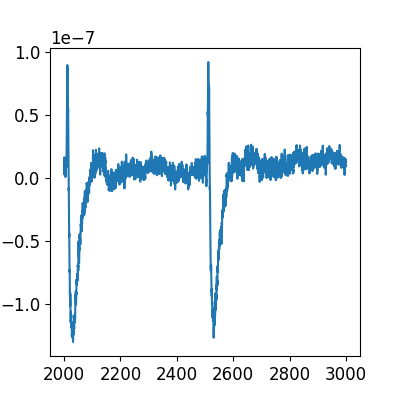

In [43]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(time,mean)

ax.plot(time,meanL6,c='C2')

# ax.plot(timeDisconnected[L6Indices],meanL6[L6Indices],'o',c='r')


# ax.fill_between(time,lowerbound,upperbound,alpha=0.3)


# ax.fill_between(timeDisconnected,lowerboundL6,upperboundL6,alpha=0.3,color='C2')

# # plt.ylim([-1.5e-7,1e-7])
# plt.xlim([2475,2800])

# plt.xlabel('Time (ms)')
# plt.ylabel('Amplitude (V)')
# plt.legend(['Default', 'Rewired','Disconnected'])
# plt.tight_layout()